/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


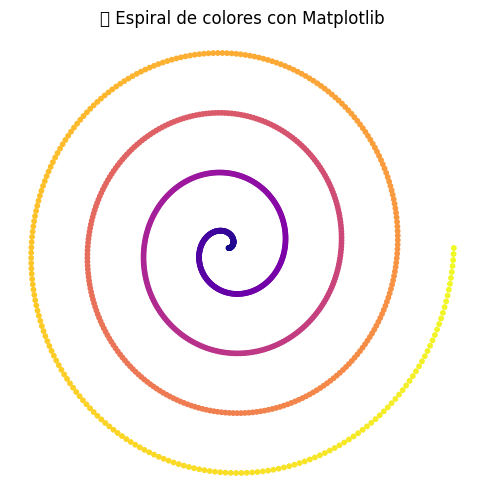

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Datos para un espiral
theta = np.linspace(0, 8*np.pi, 1000)
r = theta
x = r * np.cos(theta)
y = r * np.sin(theta)

# Colores en degradado
colors = theta

plt.figure(figsize=(6,6))
plt.scatter(x, y, c=colors, cmap="plasma", s=10)
plt.title("🌈 Espiral de colores con Matplotlib")
plt.axis("off")
plt.show()


Palmer Penguins Dataset
🏝 Fuente

Fue recopilado por la Palmer Station LTER (Long Term Ecological Research) en la Antártida, específicamente en el archipiélago Palmer.

Publicado en el artículo:

Gorman, Kristen B., Williams, Tony D., and Fraser, William R. (2014): "Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis)". PLOS ONE.

En R se encuentra en el paquete palmerpenguins, creado por Allison Horst, Alison Hill y Kristen Gorman.

🐧 Especies incluidas

El dataset contiene observaciones de tres especies de pingüinos:

Adelie (Pygoscelis adeliae)

Chinstrap (Pygoscelis antarcticus)

Gentoo (Pygoscelis papua)

📐 Variables principales
Variable	Tipo	Descripción
species	Categórica	Especie del pingüino (Adelie, Chinstrap, Gentoo).
island	Categórica	Isla donde fue registrado: Biscoe, Dream o Torgersen.
bill_length_mm	Numérica	Longitud del pico en milímetros.
bill_depth_mm	Numérica	Profundidad del pico en milímetros.
flipper_length_mm	Numérica	Longitud de la aleta en milímetros.
body_mass_g	Numérica	Masa corporal en gramos.
sex	Categórica	Sexo del pingüino (male/female). Puede tener valores faltantes (NaN).
year	Numérica	Año de muestreo (2007, 2008, 2009).


Características destacables

Es un dataset limpio y pequeño (~344 registros), ideal para enseñanza y visualización.

Tiene valores faltantes en algunas variables (sobre todo en sex y algunas medidas corporales).

Permite estudiar dimorfismo sexual (machos suelen ser más grandes).

Refleja diferencias morfológicas entre especies:

Adelie: pico corto y profundo.

Gentoo: pico largo y cuerpo más pesado.

Chinstrap: características intermedias.

Los datos permiten aplicar desde estadística descriptiva hasta modelos predictivos (clasificación de especies, regresiones).

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128039 (\N{PENGUIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


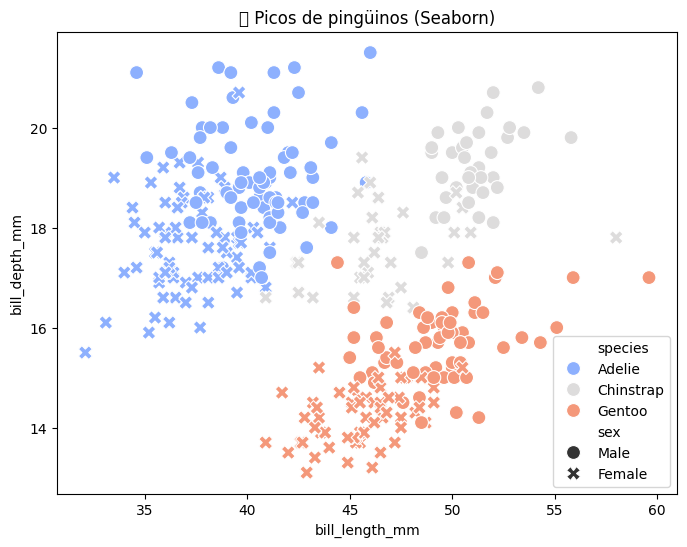

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset incluido en seaborn
penguins = sns.load_dataset("penguins")

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    style="sex",
    palette="coolwarm",
    s=100
)
plt.title("🐧 Picos de pingüinos (Seaborn)")
plt.show()


In [4]:
import plotly.graph_objects as go
import numpy as np

# Datos para una superficie 3D
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y, colorscale="Viridis")])
fig.update_layout(
    title=" Superficie 3D interactiva (Plotly)",
    scene=dict(zaxis=dict(range=[-1,1]))
)
fig.show()


In [7]:

# Preparación de los datos
!pip install -q plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

sns.set(style='whitegrid')   # estilo para gráficos basados en matplotlib/seaborn

# Cargar dataset Palmer Penguins (conjunto real, biológico)
penguins = sns.load_dataset('penguins')
df = penguins.dropna().reset_index(drop=True)   # eliminamos filas con NA para que los gráficos sean robustos

print("Filas después de dropna():", len(df))
num_cols = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']


Filas después de dropna(): 333


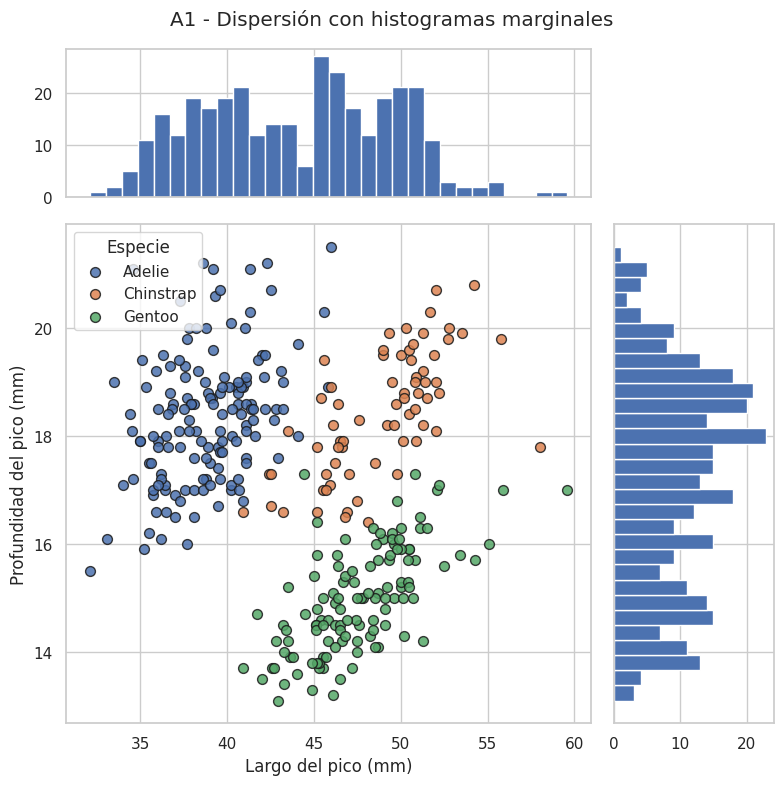

In [8]:
import matplotlib.gridspec as gridspec

x = df['bill_length_mm']
y = df['bill_depth_mm']

fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(4,4)

ax_main = fig.add_subplot(gs[1:4,0:3])    # eje principal
ax_xhist = fig.add_subplot(gs[0,0:3], sharex=ax_main)  # histograma superior
ax_yhist = fig.add_subplot(gs[1:4,3], sharey=ax_main)  # histograma derecho (vertical)

# Scatter por especie
species = df['species'].unique()
colors = plt.cm.tab10(np.linspace(0,1,len(species)))
for sp, c in zip(species, colors):
    sub = df[df['species']==sp]
    ax_main.scatter(sub['bill_length_mm'], sub['bill_depth_mm'],
                    label=sp, s=50, alpha=0.85, edgecolor='k')

ax_main.set_xlabel('Largo del pico (mm)')
ax_main.set_ylabel('Profundidad del pico (mm)')
ax_main.legend(title='Especie', loc='upper left')

# Histogramas marginales
ax_xhist.hist(x, bins=30)
ax_yhist.hist(y, bins=30, orientation='horizontal')

# Limpiar etiquetas de los hist marginales para no duplicar información
ax_xhist.tick_params(labelbottom=False)
ax_yhist.tick_params(labelleft=False)

plt.suptitle('A1 - Dispersión con histogramas marginales')
plt.tight_layout()
plt.show()


GridSpec permite colocar ejes con precisión (aquí: eje principal + dos márgenes).

scatter(x,y, s=50, alpha=0.85, edgecolor='k') dibuja puntos; s tamaño; alpha transparencia; edgecolor borde para distinguir puntos.

Los histogramas marginales muestran la distribución univariada de x y y. Útil para ver si la relación viene de valores extremos o de una distribución concentrada.

Interpretación: observa cómo se distribuye cada especie en el espacio largo vs profundidad del pico; los histogramas marginales ayudan a identificar sesgos o asimetrías en las variables.

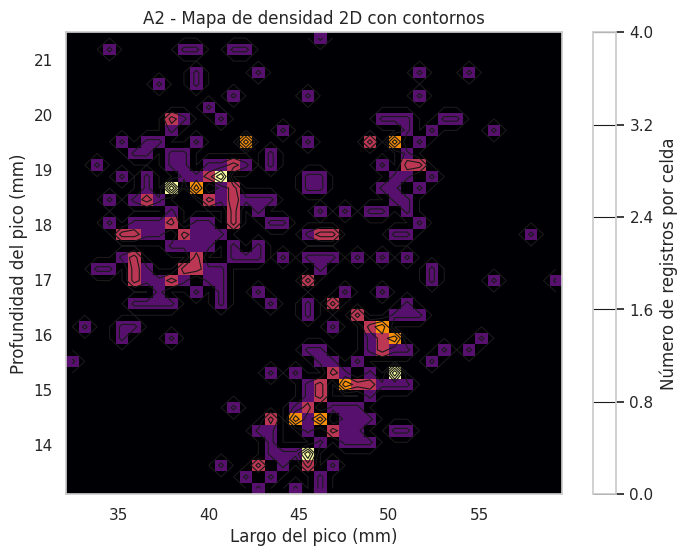

In [9]:
plt.figure(figsize=(8,6))
H, xedges, yedges = np.histogram2d(df['bill_length_mm'], df['bill_depth_mm'], bins=40)
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2
X, Y = np.meshgrid(xcenters, ycenters)

plt.pcolormesh(X, Y, H.T, shading='auto', cmap='inferno')
plt.contour(X, Y, H.T, levels=5, colors='k', linewidths=0.8)
plt.colorbar(label='Número de registros por celda')
plt.xlabel('Largo del pico (mm)')
plt.ylabel('Profundidad del pico (mm)')
plt.title('A2 - Mapa de densidad 2D con contornos')
plt.show()


np.histogram2d crea una matriz de conteos 2D (discretiza en bins).

pcolormesh pinta esa matriz como un mapa de calor contínuo; contour dibuja líneas de nivel sobre la densidad.

Parámetros importantes: bins (resolución), cmap (paleta), levels (número de contornos).

Interpretación: el mapa muestra zonas de mayor concentración (núcleos de observaciones). Los contornos ayudan a visualizar la estructura de densidad sin sobreplotear puntos.

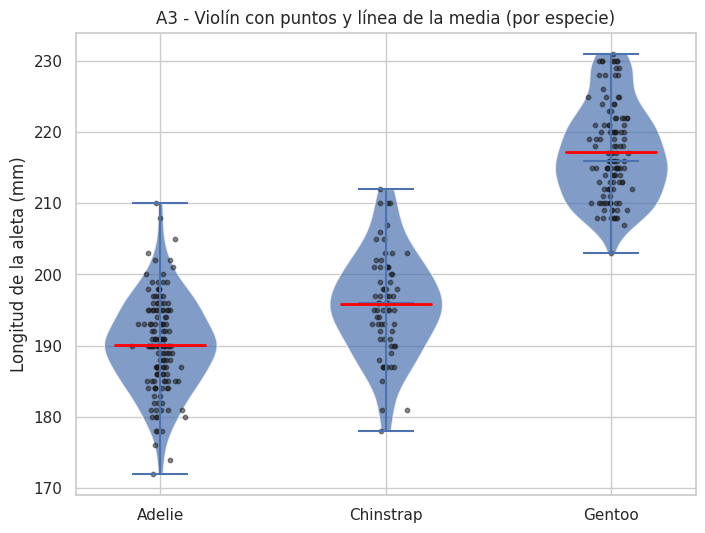

In [10]:
plt.figure(figsize=(8,6))
groups = [df[df['species']==sp]['flipper_length_mm'] for sp in species]
parts = plt.violinplot(groups, showmeans=False, showmedians=True)

# ajustar apariencia del cuerpo del violín
for pc in parts['bodies']:
    pc.set_alpha(0.7)

plt.xticks(np.arange(1,len(species)+1), species)
# añadir puntos jitter (dispersión horizontal artificial para ver cada observación)
for i, sp in enumerate(species, start=1):
    y = df[df['species']==sp]['flipper_length_mm']
    x = np.random.normal(i, 0.04, size=len(y))
    plt.scatter(x, y, color='k', s=10, alpha=0.5)

# añadir la media como una línea horizontal por especie
for i, sp in enumerate(species, start=1):
    mean = df[df['species']==sp]['flipper_length_mm'].mean()
    plt.plot([i-0.2, i+0.2], [mean, mean], color='red', linewidth=2)

plt.ylabel('Longitud de la aleta (mm)')
plt.title('A3 - Violín con puntos y línea de la media (por especie)')
plt.show()


violinplot muestra la densidad (similar a KDE reflectado). showmedians=True marca la mediana.

Superpongo puntos con scatter(... jitter) para ver cada observación real.

Trazo la media por especie con plot([x0,x1],[mean,mean]).

Interpretación: se ve la forma de la distribución (asimetrías) y la dispersión puntual. La media y la mediana ayudan a comparar sesgos entre especies.

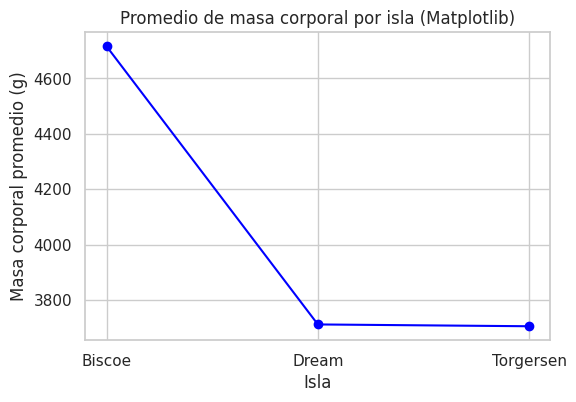

In [21]:
import matplotlib.pyplot as plt

# Calcular promedio de masa corporal por isla
penguins_group = penguins.groupby("island")["body_mass_g"].mean()

plt.figure(figsize=(6,4))
plt.plot(penguins_group.index, penguins_group.values, marker="o", linestyle="-", color="blue")
plt.title("Promedio de masa corporal por isla (Matplotlib)")
plt.xlabel("Isla")
plt.ylabel("Masa corporal promedio (g)")
plt.show()


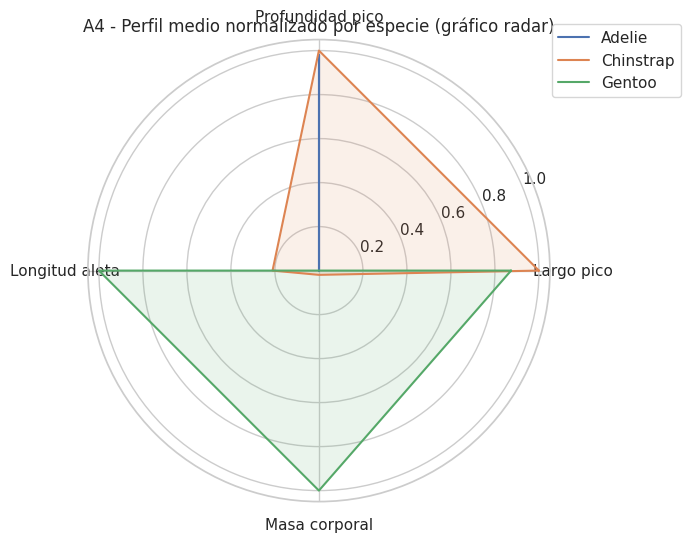

In [11]:
metrics = num_cols.copy()  # ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
labels = ['Largo pico', 'Profundidad pico', 'Longitud aleta', 'Masa corporal']
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # cerrar la figura

# medias por especie
means_by_species = {sp: df[df['species']==sp][metrics].mean().values for sp in species}
all_means = np.array(list(means_by_species.values()))
mins = all_means.min(axis=0)
maxs = all_means.max(axis=0)

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)

for sp, color in zip(species, colors):
    vals = means_by_species[sp]
    # normalizar para comparar en la misma escala (0-1) por cada métrica
    vals_norm = (vals - mins) / (maxs - mins)
    vals_plot = np.append(vals_norm, vals_norm[0])
    ax.plot(angles, vals_plot, label=sp)
    ax.fill(angles, vals_plot, alpha=0.12)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title('A4 - Perfil medio normalizado por especie (gráfico radar)')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.05))
plt.show()


El radar (o spider chart) compara perfiles multivariados en una escala común.

Normalizo cada métrica entre el mínimo y máximo de las medias para ponerlas en la misma escala y hacer la comparación visual.

ax.plot dibuja la línea radial; ax.fill rellena para facilitar lectura.

Interpretación: muestra el “perfil” promedio por especie: por ejemplo, una especie puede tener pico largo pero masa menor relativa, etc.

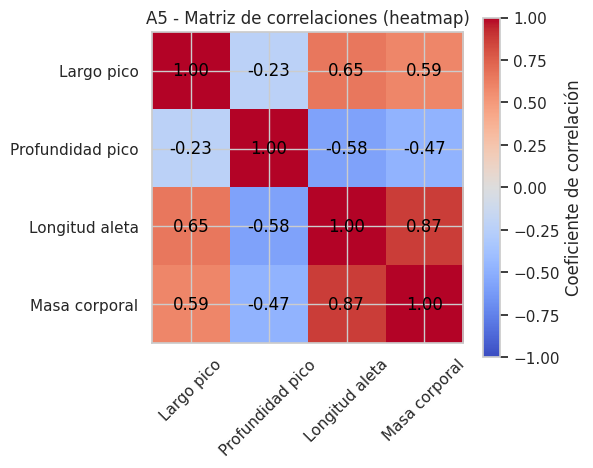

In [12]:
corr = df[num_cols].corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Coeficiente de correlación')
plt.xticks(range(len(num_cols)), ['Largo pico', 'Profundidad pico', 'Longitud aleta', 'Masa corporal'], rotation=45)
plt.yticks(range(len(num_cols)), ['Largo pico', 'Profundidad pico', 'Longitud aleta', 'Masa corporal'])
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha='center', va='center', color='black')
plt.title('A5 - Matriz de correlaciones (heatmap)')
plt.tight_layout()
plt.show()


df.corr() calcula correlaciones Pearson por defecto. imshow pinta la matriz.

Anotar valores (plt.text) facilita la lectura de la fuerza y dirección de la relación.

Interpretación: busca correlaciones fuertes (cercanas a 1 o -1) para detectar variables que se mueven juntas.

LIBRERÍA SEABORN

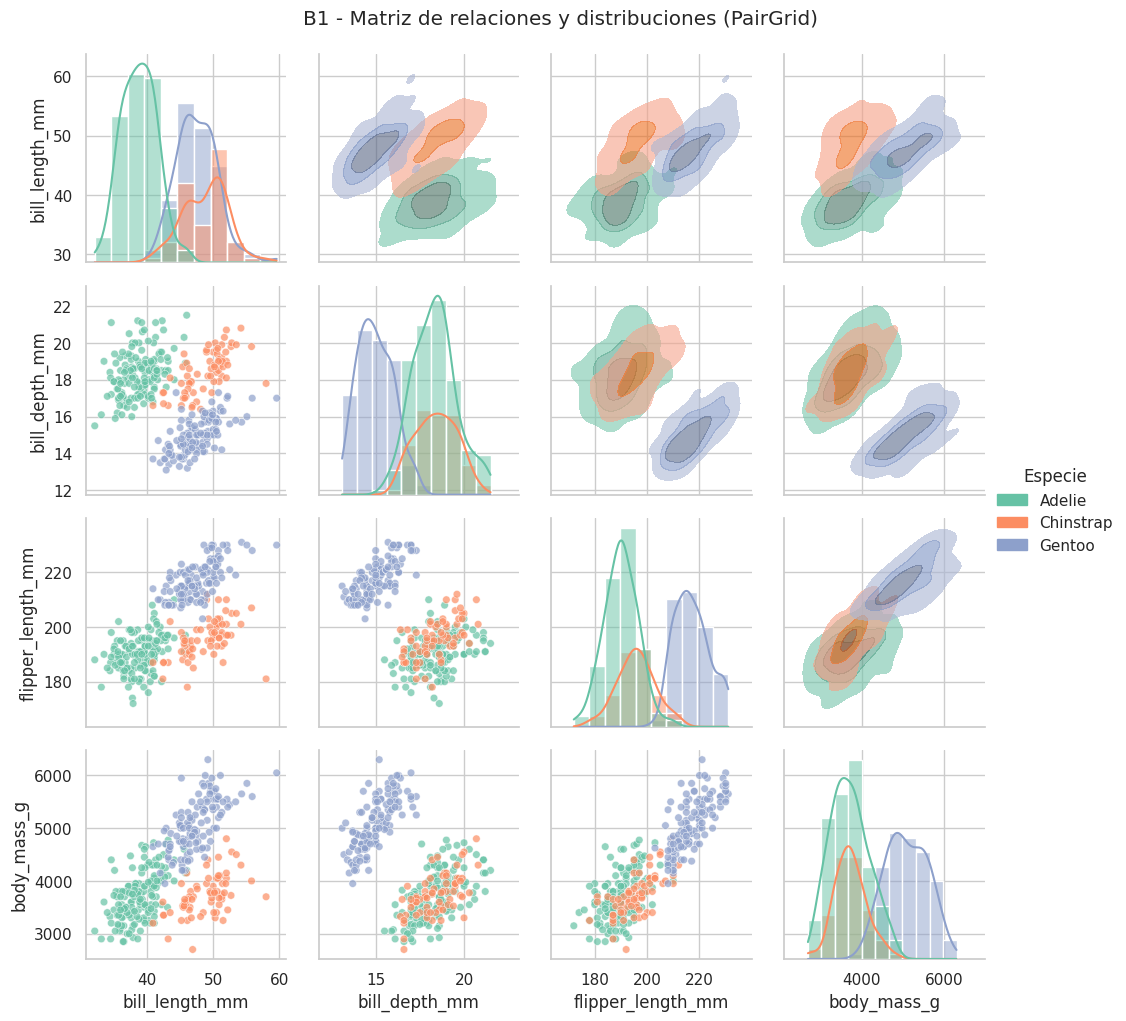

In [13]:
g = sns.PairGrid(df, vars=num_cols, hue='species', palette='Set2', diag_sharey=False)
g.map_lower(sns.scatterplot, s=30, alpha=0.7)
g.map_upper(sns.kdeplot, fill=True, levels=4, alpha=0.6)
g.map_diag(sns.histplot, kde=True)
g.add_legend(title='Especie')
plt.suptitle('B1 - Matriz de relaciones y distribuciones (PairGrid)', y=1.02)
plt.show()


PairGrid es la versión flexible de pairplot: permite distintos plots en la diagonal, superior e inferior.

map_lower y map_upper aplican funciones diferentes a cada parte de la cuadrícula.

kdeplot en la parte superior muestra contornos de densidad bivariada; histplot con kde=True en la diagonal muestra distribuciones univariadas.

Interpretación: ideal para detectar patrones entre pares de variables y ver cómo varían por especie.

/tmp/ipython-input-3392691120.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




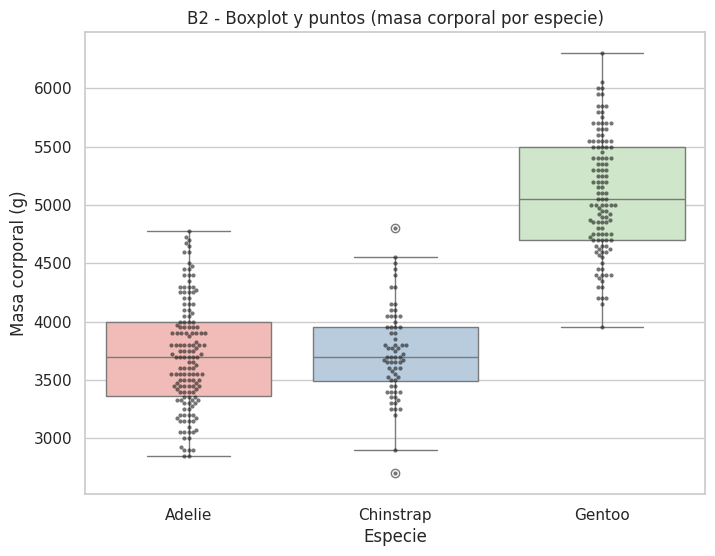

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x='species', y='body_mass_g', data=df, palette='Pastel1')
sns.swarmplot(x='species', y='body_mass_g', data=df, color='k', size=3, alpha=0.6)
plt.title('B2 - Boxplot y puntos (masa corporal por especie)')
plt.xlabel('Especie')
plt.ylabel('Masa corporal (g)')
plt.show()


boxplot resume mediana, cuartiles y whiskers; los outliers suelen aparecer como puntos fuera de las whiskers.

swarmplot coloca cada observación evitando solapamiento (jitter que mantiene la estructura de densidad).

Esto combina resumen estadístico y visibilidad de observaciones individuales.

Interpretación: compara medianas y dispersión entre especies, y detecta posibles outliers.

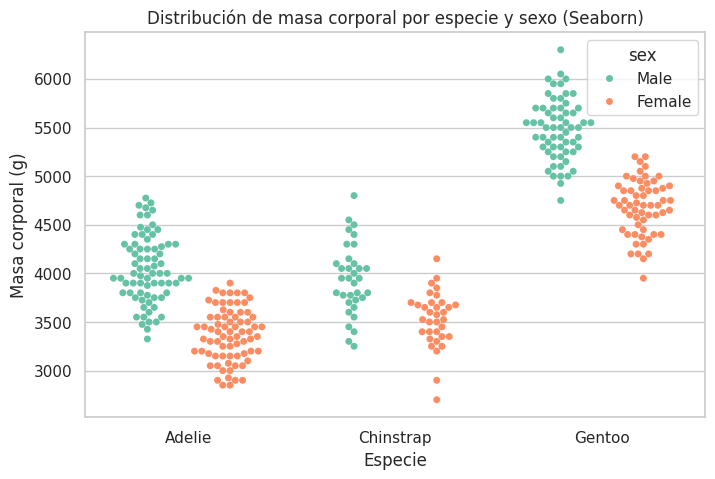

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.swarmplot(
    data=penguins,
    x="species",
    y="body_mass_g",
    hue="sex",
    palette="Set2",
    dodge=True
)
plt.title("Distribución de masa corporal por especie y sexo (Seaborn)")
plt.xlabel("Especie")
plt.ylabel("Masa corporal (g)")
plt.show()


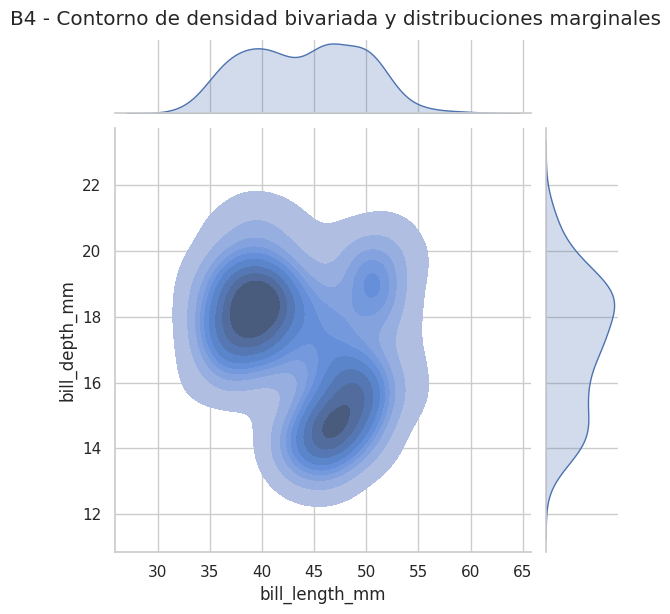

In [16]:
jp = sns.jointplot(data=df, x='bill_length_mm', y='bill_depth_mm', kind='kde', fill=True, thresh=0.05, height=6)
jp.fig.suptitle('B4 - Contorno de densidad bivariada y distribuciones marginales', y=1.02)
plt.show()


jointplot(kind='kde') muestra el contorno de la densidad bivariada en el panel central y las densidades marginales en los ejes.

fill=True rellena las regiones de densidad; thresh elimina regiones de muy baja densidad para limpieza.

Interpretación: identifica la forma y orientación de la nube de puntos (si es circular, alargada, bimodal, etc.) y compara con las distribuciones marginales.

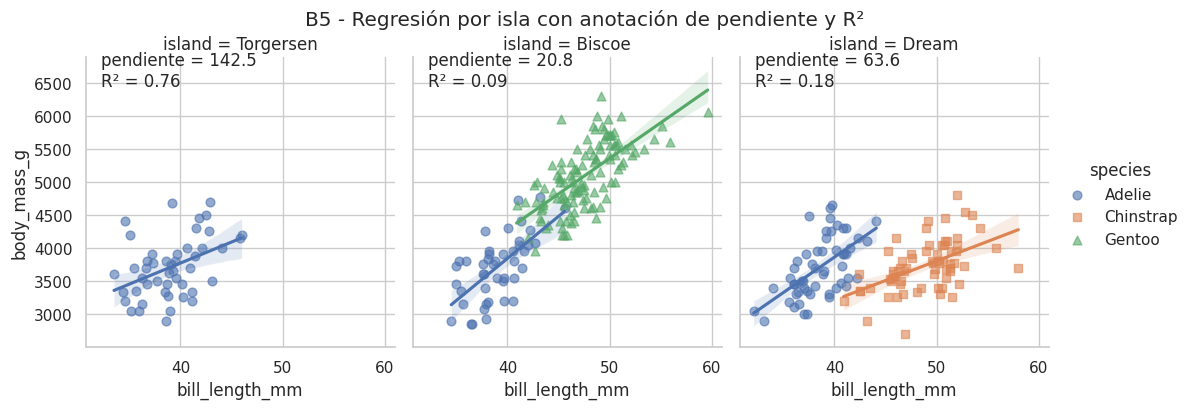

In [17]:
g = sns.lmplot(x='bill_length_mm', y='body_mass_g', col='island', hue='species',
               data=df, height=4, aspect=0.9,
               scatter_kws={'s':40,'alpha':0.6}, markers=['o','s','^'])

# Calcular pendiente y R^2 por isla (para los puntos combinados de cada isla)
islands = sorted(df['island'].unique())
for ax, isl in zip(g.axes.flatten(), islands):
    subset = df[df['island']==isl]
    m, b = np.polyfit(subset['bill_length_mm'], subset['body_mass_g'], 1)
    r = np.corrcoef(subset['bill_length_mm'], subset['body_mass_g'])[0,1]
    ax.text(0.05, 0.90, f'pendiente = {m:.1f}\nR² = {r**2:.2f}', transform=ax.transAxes)

g.fig.suptitle('B5 - Regresión por isla con anotación de pendiente y R²', y=1.02)
plt.show()


lmplot combina FacetGrid y regplot: muestra ajustes lineales por grupo (hue='species') y facetas por isla (col='island').

Uso np.polyfit para calcular la pendiente m y np.corrcoef para obtener r (para R²). ax.text coloca la anotación en cada faceta.

Interpretación: verás si la relación entre largo del pico y masa corporal es lineal y cuánto varía por isla; la pendiente y R² resumen la fuerza y dirección de la relación.

LIBRERÍA PLOTLY

In [18]:
fig = px.scatter(df,
                 x='bill_length_mm',
                 y='bill_depth_mm',
                 color='species',
                 symbol='sex',
                 size='body_mass_g',
                 hover_data=['island','flipper_length_mm'],
                 title='C1 - Largo del pico vs Profundidad del pico (interactivo)')
fig.update_layout(legend_title='Especie')
fig.show()


color colorea por categoría; symbol cambia forma del marcador según sex.

size escala los marcadores según body_mass_g (permite ver una tercera dimensión).

hover_data muestra campos adicionales al pasar el cursor.

Interpretación: explora interactivamente correlaciones y outliers; al hacer zoom es fácil aislar subconjuntos.

In [25]:
fig = px.scatter_3d(df,
                    x='bill_length_mm',
                    y='bill_depth_mm',
                    z='flipper_length_mm',
                    color='species',
                    size='body_mass_g',
                    hover_data=['island','sex'],
                    title='C2 - Visualización 3D de medidas morfométricas')
fig.update_traces(marker=dict(opacity=0.8))
fig.show()


scatter_3d permite rotar y acercar el conjunto de puntos en 3D; size añade una dimensión visual extra.

update_traces(marker=dict(opacity=0.8)) controla la opacidad de los marcadores para mejorar la lectura.

Interpretación: útil para detectar clusters que no se ven en 2D; la interacción aporta intuición espacial.

In [19]:
cols_pc = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
fig = px.parallel_coordinates(df, dimensions=cols_pc, color='body_mass_g',
                              labels={
                                  'bill_length_mm':'Largo pico (mm)',
                                  'bill_depth_mm':'Profundidad pico (mm)',
                                  'flipper_length_mm':'Longitud aleta (mm)',
                                  'body_mass_g':'Masa corporal (g)'
                              },
                              title='C3 - Coordenadas paralelas para comparación multivariante')
fig.show()


Cada línea representa un individuo; cada eje es una variable.

color='body_mass_g' colorea las líneas según masa corporal, facilitando ver cómo una variable numérica correlaciona con el patrón multivariante.

Interpretación: observa combinaciones de valores (por ejemplo, individuos con alta masa y valores extremos en alguna otra variable).

In [23]:
import plotly.express as px

fig = px.bar(
    penguins,
    x="species",
    color="sex",
    barmode="group",
    title="Conteo de pingüinos por especie y sexo (Plotly)"
)
fig.show()

In [27]:
import plotly.express as px

# Eliminar filas con NaN en las columnas usadas en la jerarquía
penguins_clean = penguins.dropna(subset=["island", "species", "sex"])

# Crear el sunburst: Isla → Especie → Sexo
fig = px.sunburst(
    penguins_clean,
    path=["island", "species", "sex"],  # Jerarquía
    color="species",                    # Colorear por especie
    title="Distribución jerárquica de pingüinos por isla, especie y sexo",
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Ajustes para hacerlo más atractivo
fig.update_traces(
    textinfo="label+percent parent+percent entry",  # Nombre + % relativos
    insidetextorientation="radial"
)
fig.update_layout(
    margin=dict(t=50, l=10, r=10, b=10),
    font=dict(size=14)
)

fig.show()



sunburst muestra proporciones jerárquicas: el área de cada sector es proporcional al número de observaciones.

path define la jerarquía: primero isla, luego especie, luego sexo.

Interpretación: de un vistazo verás la composición del muestreo: qué islas aportan más individuos y qué especies/sexos dominan.

In [29]:
import plotly.express as px

# Limpiamos datos para evitar NaN
penguins_clean = penguins.dropna(subset=["bill_length_mm", "bill_depth_mm", "body_mass_g", "species", "sex"])

# Scatter animado tipo Gapminder
fig = px.scatter(
    penguins_clean,
    x="bill_length_mm",
    y="bill_depth_mm",
    size="body_mass_g",
    color="species",
    animation_frame="sex",  # Se genera la animación por sexo
    hover_name="species",
    size_max=20,
    title="Relación entre pico y masa corporal de pingüinos (animado por sexo)",
    color_discrete_sequence=px.colors.qualitative.Bold
)

# Ajustes estéticos
fig.update_layout(
    xaxis_title="Largo del pico (mm)",
    yaxis_title="Profundidad del pico (mm)",
    font=dict(size=14)
)

fig.show()


In [ ]:

# En Colab, seaborn ya está instalado; plotly  también, se incluye para que lo tengan los estudiantes por si acaso.
#  Comente o borre si no la requiere.

!pip install -q plotly

# %%
# 1) Carga de librerías y dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Cargar dataset Palmer Penguins desde seaborn (tomado de mediciones de pingüinos)
penguins = sns.load_dataset('penguins')

# Exploración rápida
print('Columnas disponibles:', penguins.columns.tolist())
print('\nPrimeras filas:')
print(penguins.head())

# Limpiar: quitamos filas con NA para que todos los gráficos funcionen sin errores.
orig = len(penguins)
df = penguins.dropna().reset_index(drop=True)
print(f'Filas originales: {orig} — Filas tras dropna(): {len(df)}')

# Selección de variables numéricas para la visualización
num_cols = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']


# SECCIÓN A — MATPLOTLIB

"""
Matplotlib: la librería base para crear figuras en Python.
- plt.figure() crea un lienzo.
- plt.scatter(), plt.hist(), plt.imshow(), plt.violinplot(), plt.hexbin() son funciones básicas.

"""

# A1) Scatter básico: bill_length_mm vs bill_depth_mm, color por especie
plt.figure(figsize=(8,6))                         # define el tamaño del lienzo o figura en pulgadas
species = df['species'].unique()
colors = plt.cm.tab10(np.linspace(0,1,len(species)))  # selección de una paleta

for sp, c in zip(species, colors):
    sub = df[df['species']==sp]

    # plt.scatter(x, y, s=tamaño, alpha=transparencia, edgecolor, label)
    plt.scatter(sub['bill_length_mm'], sub['bill_depth_mm'], s=60, alpha=0.8, edgecolor='k', label=sp)

plt.xlabel('Largo del pico (mm)')
plt.ylabel('Profundidad del pico (mm)')
plt.title('A1 — Scatter: Largo vs Profundidad del pico (Matplotlib)')
plt.legend(title='Especie')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# Explicación breve: loop por especies para trazar cada grupo por separado y crear leyenda clara.

# A2) Hexbin: mapa de densidad 2D útil cuando hay muchos puntos
plt.figure(figsize=(8,6))
plt.hexbin(df['bill_length_mm'], df['bill_depth_mm'], gridsize=30, cmap='inferno', mincnt=1)
plt.colorbar(label='Número de registros (bins)')
plt.xlabel('Largo del pico (mm)')
plt.ylabel('Profundidad del pico (mm)')
plt.title('A2 — Hexbin: Densidad de puntos (Matplotlib)')
plt.show()

# Explicación: hexbin hace un histograma 2D agrupando (x,y) en hexágonos; 'gridsize' controla resolución.

# A3) Violin plots con matplotlib puro: distribución de body_mass_g por especie
# Preparar datos por especie
groups = [df[df['species']==sp]['body_mass_g'].values for sp in species]
plt.figure(figsize=(8,6))
plt.violinplot(groups, showmeans=True, showmedians=False)
plt.xticks(np.arange(1,len(species)+1), species)
plt.ylabel('Masa corporal (g)')
plt.title('A3 — Violin plots: Masa corporal por especie (Matplotlib)')
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.show()

# Explicación: violinplot dibuja la densidad (como un KDE simétrico) por grupo. showmeans pinta la media.

# A4) Histogramas superpuestos por especie (comparación directa)
plt.figure(figsize=(8,6))
bins = np.linspace(df['body_mass_g'].min(), df['body_mass_g'].max(), 25)
for sp in species:
    subset = df[df['species']==sp]['body_mass_g']
    plt.hist(subset, bins=bins, alpha=0.5, label=sp)
plt.xlabel('Masa corporal (g)')
plt.ylabel('Frecuencia')
plt.title('A4 — Histogramas superpuestos por especie (Matplotlib)')
plt.legend()
plt.show()

# Explicación: hist superpone distribuciones; 'alpha' controla transparencia para ver solapamientos.

# A5) Heatmap de correlaciones (matriz) con anotaciones manuales
corr = df[num_cols].corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Coef. correlación')
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)
# Anotar los valores encima de cada celda
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha='center', va='center', color='black')
plt.title('A5 — Heatmap: Correlaciones (Matplotlib)')
plt.tight_layout()
plt.show()

# Explicación: corr() calcula la matriz de correlaciones; imshow la visualiza como una imagen con coloreado.

# %%
# ======================================================================
# SECCIÓN B — SEABORN (5 gráficos + explicación detallada)
# ======================================================================

"""
Seaborn: construida sobre Matplotlib, especializada en visualizaciones estadísticas.
Comandos claves: sns.pairplot, sns.boxplot, sns.violinplot, sns.jointplot, sns.lmplot
Seaborn maneja colores, legendas y subconjuntos muy fácilmente.
"""

# B1) Pairplot: matriz de gráficos para ver relaciones entre variables numéricas
sns.pairplot(df, vars=num_cols, hue='species', diag_kind='kde', corner=False)
plt.suptitle('B1 — Pairplot: relaciones y densidades (Seaborn)', y=1.02)
plt.show()

# Explicación: pairplot crea una cuadrícula de scatterplots (y diagonales con KDEs).
# 'hue' colorea por categoría; 'diag_kind' elige tipo de gráfico en la diagonal.

# B2) Boxplot: comparación clara de medianas y rangos por especie
plt.figure(figsize=(8,5))
sns.boxplot(x='species', y='body_mass_g', data=df)
plt.title('B2 — Boxplot: Masa corporal por especie (Seaborn)')
plt.ylabel('Masa corporal (g)')
plt.show()

# Explicación: boxplot muestra mediana, cuartiles y valores atípicos (outliers).

# B3) Violin + stripplot: combinación que muestra densidad y puntos individuales
plt.figure(figsize=(8,5))
sns.violinplot(x='species', y='flipper_length_mm', data=df, inner=None)
# overlay de puntos individuales
sns.stripplot(x='species', y='flipper_length_mm', data=df, color='k', alpha=0.5, jitter=0.15)
plt.title('B3 — Violin + strip: Flipper length por especie (Seaborn)')
plt.show()

# Explicación: violinplot muestra densidad; stripplot añade cada observación (útil para ver dispersión real).

# B4) Jointplot: enfoque en la relación entre dos variables con KDE / hist
sns.jointplot(data=df, x='bill_length_mm', y='bill_depth_mm', kind='hex', marginal_ticks=True)
plt.suptitle('B4 — Jointplot (Seaborn): Densidad hexagonal entre largo y profundidad', y=1.02)
plt.show()

# Explicación: jointplot combina scatter/hex/density en el panel central y muestra distributions marginales.

# B5) FacetGrid / lmplot: subplots por isla mostrando regresión simple
sns.lmplot(x='bill_length_mm', y='body_mass_g', col='island', hue='species', data=df,
           height=4, aspect=0.9, scatter_kws={'s':40, 'alpha':0.7})
plt.suptitle('B5 — lmplot: Relación Largo pico vs Masa corporal por isla (Seaborn)', y=1.02)
plt.show()

# Explicación: lmplot construye un FacetGrid y, por defecto, ajusta una regresión lineal por grupo cuando se pide 'hue'.

# %%
# ======================================================================
# SECCIÓN C — PLOTLY (5 gráficos interactivos + explicación detallada)
# ======================================================================

"""
Plotly (plotly.express & graph_objects): librería para gráficos interactivos.
- fig.show() abre un elemento interactivo en Colab: zoom, hover, rotación 3D.
- px = plotly.express para trazos rápidos; graph_objects para control fino.
"""

# C1) Scatter interactivo con hover, tamaño y símbolos
fig = px.scatter(df, x='bill_length_mm', y='bill_depth_mm', color='species', symbol='sex',
                 size='body_mass_g', hover_data=['island','flipper_length_mm'],
                 title='C1 — Scatter interactivo (Plotly): Largo vs Profundidad del pico')
fig.update_layout(legend_title='Especie')
fig.show()

# Explicación: color= colorea por categoría; symbol= cambia el marcador por sex; size= escala el marcador.

# C2) Scatter 3D: explorar 3 variables numéricas a la vez
fig = px.scatter_3d(df, x='bill_length_mm', y='bill_depth_mm', z='flipper_length_mm', color='species',
                    size='body_mass_g', hover_data=['island','sex'],
                    title='C2 — Scatter 3D interactivo (Plotly)')
fig.update_traces(marker=dict(opacity=0.8))
fig.show()

# Explicación: scatter_3d permite rotar la nube de puntos y examinar relaciones multivariadas.

# C3) Parallel coordinates: visualización multivariante para cada observación
# Seleccionamos columnas numéricas y codificamos species a colores (plotly lo maneja internamente)
pc_cols = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','species']
fig = px.parallel_coordinates(df[npc_cols], color='body_mass_g', labels={
    'bill_length_mm':'Largo pico','bill_depth_mm':'Profundidad pico','flipper_length_mm':'Flipper','body_mass_g':'Masa (g)'
}, title='C3 — Parallel coordinates: Comparación multivariante (Plotly)')
fig.show()

# Explicación: cada línea representa un individuo; ejes paralelos muestran valores normalizados.
# color= resalta una dimensión numérica (aquí masa corporal).

# C4) Sunburst: jerarquía categórica (isla -> especie -> sexo) con tamaño por cuenta
fig = px.sunburst(df, path=['island','species','sex'], title='C4 — Sunburst: conteos jerárquicos (Plotly)')
fig.show()

# Explicación: sunburst muestra proporciones jerárquicas; útil para ver composición categórica.

# C5) Violin interactivo con puntos y caja resumida
fig = px.violin(df, x='species', y='body_mass_g', color='species', box=True, points='all',
                hover_data=['island','sex'], title='C5 — Violin interactivo (Plotly): Masa por especie')
fig.show()

# Explicación: violin de plotly es interactivo: pasa el cursor para ver estadísticas rápidas; 'points=all' muestra cada observación.


# ======================================================================

# Guardar figuras estáticas (matplotlib)
plt.figure(figsize=(4,3))
plt.scatter(df['bill_length_mm'], df['bill_depth_mm'])
plt.title('Ejemplo para guardar')
plt.savefig('scatter_matplotlib_example.png', dpi=150)
print('Guardado: scatter_matplotlib_example.png')

# Guardar plotly interactivo como HTML
fig = px.scatter(df, x='bill_length_mm', y='bill_depth_mm', color='species', title='Export Plotly')
fig.write_html('plotly_scatter_example.html')
print('Guardado: plotly_scatter_example.html (descargable desde Colab)')


